# **HOMEWORK 2: PANDAS and SQL (TOTAL 80)**
## **DUE: *SEPTEMBER 26, 2024 @ 11:59 PM***

---------------------
#### **DATASET DESCRIPTION**

The [NCEI/WDS Global Significant Volcanic Eruptions Database](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ngdc.mgg.hazards:G10147) is a very comprehensive collection of +600 volcanic eruptions dating from 4360 BC to the present. Due to the nature of this assignment, we will be dealing with relatively newer volcanoes (in which some are still obviously still older than anyone on Earth currently). Each eruption in the database is classified as significant if it meets one or more criteria, such as causing fatalities, incurring **damage on property** (**+$1 million**), reaching a **Volcanic Explosivity Index (VEI)** of **6 or higher**, generating a tsunami, or being linked to a significant earthquake. The VEI is a scale that measures the explosiveness of volcanic eruptions, providing insight into the magnitude and potential consequences of the eruptions. The database includes detailed information on the location, type of volcano, last known eruption, VEI, casualties, property damage, and much more.
![volcano](https://wikitravel.org/upload/shared//9/99/Volcano_de_Fuego_Banner.jpg)

#### **Objective of the Assignment:**


We will proceed directly to exploring these volcanic datasets, with the aim of enhancing our proficiency in Pandas and SQL.

For your reference, the [Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html) will be an invaluable resource. Additionally, we have provided several helpful links to assist you throughout this process. Please proceed with caution to avoid any potential pitf

---------------------

### **DO NOT REMOVE ANY PART OF ANY OF THE QUESTIONS OR YOU LOSE CREDIT**
### *No Hardcoding either*  
### **REMEMBER TO SHOW ALL CODE OUTPUT (NO CREDIT OTHERWISE)**

### **Part 1: Maintenance  (25 POINTS TOTAL)**

First, in this section, we will focus on the initial steps of the process.

As is standard practice in Python programming, it is best to import necessary modules at the beginning of your script before writing any additional code. This approach ensures that all required libraries are available from the start.

In [4]:
# Make sure these code blocks run properly and that you have properly installed the appropriate modules required.
import pandas as pd
import requests
# import other libraries here

# Don't remove this
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

As you may have noticed, there is an additional library, apart from Pandas, called "[requests](https://requests.readthedocs.io/en/latest/)."

**The requests library enables you to send HTTP requests to a server, retrieve content, and process it with ease.**  It is particularly user-friendly for beginners venturing into web scraping, which is crucial for collecting and constructing datasets. Additionally, we recommend exploring [BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/), , a complementary library that can be used alongside requests for more efficient web scraping.

* As shown below, sometimes specific websites require specific headers in order to process a request to access the data.

* To check if a request was processed successfully, use the [status_code](https://requests.readthedocs.io/en/latest/api/) function to see if the process returned 200.

In [6]:
# API URL and headers in case request gets denied.
api_url = "https://www.ngdc.noaa.gov/hazel/hazard-service/api/v1/volcanoes"

headers = {
    'accept': '*/*'
}

#### **TASK 1.0: Webscraping (5 points)**

To develop our web scraper, we need to **initiate a GET request** a GET request using the relevant information provided above.

This specific NOAA dataset API returns data in JSON format when a request is made. The JSON data is structured in a particular format, so we will extract the necessary information solely from the field named "items" to construct a DataFrame.

**After successfully scraping the data, name the resulting DataFrame** ***df***

**Subsequently, save this DataFrame to a CSV file named volcanoes.csv.**

**This process should only need to be executed once.**


In [8]:
# initiating get requests
r=requests.get(api_url, auth=('user', 'pass'))
#checking the status code
print(r.status_code)
#getting items values from the json
items=r.json()['items']
#print(items)
#storing the dataframe
df = pd.DataFrame(items)
print(df)
#storing the dataframe data into volcanoes.csv file:
df.to_csv('volcanoes.csv', index=False)

200
      id  year  month   day  tsunamiEventId  earthquakeEventId  \
0      1  1169    2.0   4.0          2852.0              421.0   
1      2  1329    7.0   NaN             NaN                NaN   
2      3  1883    3.0   NaN             NaN                NaN   
3      4  1888    3.0  13.0          1175.0                NaN   
4      5  1850    NaN   NaN             NaN                NaN   
5      6  1832   11.0   1.0             NaN                NaN   
6      7  1977    1.0  10.0             NaN                NaN   
7      8   787    NaN   NaN             NaN                NaN   
8      9  1779    8.0   8.0             NaN                NaN   
9     10  1302    NaN   NaN             NaN                NaN   
10    11  1907    8.0   4.0             NaN                NaN   
11    12  1905    3.0  10.0             NaN                NaN   
12    13  1986    7.0  24.0             NaN                NaN   
13    14  1536    3.0  23.0             NaN                NaN   
14    

#### **TASK 1.1: 1-Liner Overview (3 points)**
To gain an understanding of the dataset's structure, we need to examine some fundamental characteristics of the DataFrame. We need to get an idea of what this dataset is going to look. In order to do that, let's take a look at some of the most [basic things](https://dataanalytics.buffalostate.edu/pandas-cheat-sheet) our dataframe has.


***CAN'T USE LOOPS. DO NOT DISPLAY THE DATAFRAME, JUST YOUR CODE OUTPUT HERE.***

**1.1.1:** *In one line of code and **using only one function**, show how many **total datapoints and features** there are in the dataframe **together**.*

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               200 non-null    int64  
 1   year                             200 non-null    int64  
 2   month                            177 non-null    float64
 3   day                              153 non-null    float64
 4   tsunamiEventId                   37 non-null     float64
 5   earthquakeEventId                17 non-null     float64
 6   volcanoLocationId                200 non-null    int64  
 7   volcanoLocationNewNum            200 non-null    int64  
 8   volcanoLocationNum               200 non-null    object 
 9   name                             200 non-null    object 
 10  location                         200 non-null    object 
 11  country                          200 non-null    object 
 12  latitude              

**1.1.2:** *In one line of code, list the **names** of all the **features** in the dataframe.*

In [13]:
df.columns

Index(['id', 'year', 'month', 'day', 'tsunamiEventId', 'earthquakeEventId',
       'volcanoLocationId', 'volcanoLocationNewNum', 'volcanoLocationNum',
       'name', 'location', 'country', 'latitude', 'longitude', 'elevation',
       'morphology', 'agent', 'deathsTotal', 'deathsAmountOrderTotal',
       'damageAmountOrderTotal', 'significant', 'publish', 'eruption',
       'status', 'timeErupt', 'vei', 'deathsAmountOrder', 'damageAmountOrder',
       'housesDestroyedAmountOrderTotal', 'deaths', 'injuries',
       'injuriesAmountOrder', 'injuriesTotal', 'injuriesAmountOrderTotal',
       'housesDestroyedAmountOrder', 'housesDestroyed', 'housesDestroyedTotal',
       'missingAmountOrder', 'missingAmountOrderTotal', 'missing',
       'missingTotal', 'damageMillionsDollars', 'damageMillionsDollarsTotal'],
      dtype='object')

We won't be using some of the data because there is a lot of missing data.

**1.1.3:** *In one line of code, create a **new dataframe** called **new_df** that **contains all** the features of the **old** dataframe **except the following**:*

volcanoLocationNum, location, latitude, longitude, agent, significant,	publish,	eruption,	status, timeErupt, damageAmountOrder, damageAmountOrderTotal, housesDestroyedAmountOrder,	housesDestroyedAmountOrderTotal, housesDestroyed,	housesDestroyedTotal,	missingAmountOrder,	missingAmountOrderTotal,	missing,	missingTotal, damageMillionsDollars, damageMillionsDollarsTotal, injuries, injuriesAmountOrder, injuriesTotal, injuriesAmountOrderTotal, deathsAmountOrderTotal, and deathsAmountOrder.



In [15]:
# KEEP THIS. It will display the whole dataframe.
new_df=df.drop(columns=['volcanoLocationNum', 'location', 'latitude', 'longitude', 'agent', 'significant', 'publish', 'eruption', 'status', 'timeErupt', 'damageAmountOrder',
                        'damageAmountOrderTotal', 'housesDestroyedAmountOrder', 'housesDestroyedAmountOrderTotal', 'housesDestroyed', 'housesDestroyedTotal', 'missingAmountOrder',
                        'missingAmountOrderTotal', 'missing', 'missingTotal', 'damageMillionsDollars', 'damageMillionsDollarsTotal', 'injuries', 'injuriesAmountOrder', 'injuriesTotal',
                        'injuriesAmountOrderTotal', 'deathsAmountOrderTotal', 'deathsAmountOrder'])
print(new_df)

      id  year  month   day  tsunamiEventId  earthquakeEventId  \
0      1  1169    2.0   4.0          2852.0              421.0   
1      2  1329    7.0   NaN             NaN                NaN   
2      3  1883    3.0   NaN             NaN                NaN   
3      4  1888    3.0  13.0          1175.0                NaN   
4      5  1850    NaN   NaN             NaN                NaN   
5      6  1832   11.0   1.0             NaN                NaN   
6      7  1977    1.0  10.0             NaN                NaN   
7      8   787    NaN   NaN             NaN                NaN   
8      9  1779    8.0   8.0             NaN                NaN   
9     10  1302    NaN   NaN             NaN                NaN   
10    11  1907    8.0   4.0             NaN                NaN   
11    12  1905    3.0  10.0             NaN                NaN   
12    13  1986    7.0  24.0             NaN                NaN   
13    14  1536    3.0  23.0             NaN                NaN   
14    15  

#### **TASK 1.2: 1 Liner Shenaniganz (7 points)**

We're going to tidy up the **new dataframe** a little more with some more advanced 1 liner code.

**Read the directions carefully and code your answer with only one line of code.**

**For this section, keep the method of display that is already in the box. Write your code as indicated.**

***YOU CAN'T USE ONE LINE LOOPS OR ANY KIND OF LOOP.***

**1.2.1:** *In one line of code, **discard any row** that contains **NaN** in **any one** of the columns indicating **time**.*

In [18]:
# KEEP THIS. It will display the whole dataframe.
new_df.dropna(subset=['year','month','day'],inplace=True)
new_df

,id,year,month,day,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths
0,1,1169,2.0,4.0,2852.0,421.0,10106,211060,Etna,Italy,3357,Stratovolcano,16000.0,NaN,NaN
3,4,1888,3.0,13.0,1175.0,NaN,50107,251070,Ritter Island,Papua New Guinea,75,Stratovolcano,NaN,2.0,NaN
5,6,1832,11.0,1.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,2.0,NaN
6,7,1977,1.0,10.0,NaN,NaN,20303,223030,Nyiragongo,"Congo, DRC",3470,Stratovolcano,NaN,1.0,NaN
8,9,1779,8.0,8.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,2.0,NaN
10,11,1907,8.0,4.0,NaN,NaN,201112,221112,Alayta,Ethiopia,1496,Shield volcano,NaN,2.0,NaN
11,12,1905,3.0,10.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,1.0,2.0,1.0
12,13,1986,7.0,24.0,NaN,NaN,10104,211040,Stromboli,Italy,924,Stratovolcano,1.0,2.0,1.0
13,14,1536,3.0,23.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,1.0,3.0,1.0
14,15,1904,2.0,25.0,NaN,NaN,30301,233010,Karthala,Comoros,2361,Shield volcano,1.0,2.0,1.0


**1.2.2:** *In one line of code, **reset** the **index column** of the dataframe so that it has **1-based indexing**.*

In [20]:
new_df.index = range(1, len(new_df) + 1)
# KEEP THIS. It will display the whole dataframe.
new_df

,id,year,month,day,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths
1,1,1169,2.0,4.0,2852.0,421.0,10106,211060,Etna,Italy,3357,Stratovolcano,16000.0,NaN,NaN
2,4,1888,3.0,13.0,1175.0,NaN,50107,251070,Ritter Island,Papua New Guinea,75,Stratovolcano,NaN,2.0,NaN
3,6,1832,11.0,1.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,2.0,NaN
4,7,1977,1.0,10.0,NaN,NaN,20303,223030,Nyiragongo,"Congo, DRC",3470,Stratovolcano,NaN,1.0,NaN
5,9,1779,8.0,8.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,2.0,NaN
6,11,1907,8.0,4.0,NaN,NaN,201112,221112,Alayta,Ethiopia,1496,Shield volcano,NaN,2.0,NaN
7,12,1905,3.0,10.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,1.0,2.0,1.0
8,13,1986,7.0,24.0,NaN,NaN,10104,211040,Stromboli,Italy,924,Stratovolcano,1.0,2.0,1.0
9,14,1536,3.0,23.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,1.0,3.0,1.0
10,15,1904,2.0,25.0,NaN,NaN,30301,233010,Karthala,Comoros,2361,Shield volcano,1.0,2.0,1.0


The **deathsTotal** and **deaths**  columns have approximations of the same data with alternating NaNs in each.

**1.2.3:** *In one line of code, make a **new column** called **'totalDeaths'** that takes the **max** of the values given between those* ***two*** *columns. If there is* ***NaN*** *in* ***one column*** *and a* ***numerical*** *value in the* ***other***, *it will ***take the numerical value***. ***Only*** if there are* ***NaNs*** *in* ***both*** *columns, the* ***new column will have NaN.***

In [22]:
new_df['totalDeaths']=new_df[["deathsTotal", "deaths"]].max(axis=1)
# KEEP THIS. It will display the whole dataframe.
new_df

,id,year,month,day,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths,totalDeaths
1,1,1169,2.0,4.0,2852.0,421.0,10106,211060,Etna,Italy,3357,Stratovolcano,16000.0,NaN,NaN,16000.0
2,4,1888,3.0,13.0,1175.0,NaN,50107,251070,Ritter Island,Papua New Guinea,75,Stratovolcano,NaN,2.0,NaN,NaN
3,6,1832,11.0,1.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,2.0,NaN,NaN
4,7,1977,1.0,10.0,NaN,NaN,20303,223030,Nyiragongo,"Congo, DRC",3470,Stratovolcano,NaN,1.0,NaN,NaN
5,9,1779,8.0,8.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,2.0,NaN,NaN
6,11,1907,8.0,4.0,NaN,NaN,201112,221112,Alayta,Ethiopia,1496,Shield volcano,NaN,2.0,NaN,NaN
7,12,1905,3.0,10.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,1.0,2.0,1.0,1.0
8,13,1986,7.0,24.0,NaN,NaN,10104,211040,Stromboli,Italy,924,Stratovolcano,1.0,2.0,1.0,1.0
9,14,1536,3.0,23.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,1.0,3.0,1.0,1.0
10,15,1904,2.0,25.0,NaN,NaN,30301,233010,Karthala,Comoros,2361,Shield volcano,1.0,2.0,1.0,1.0


#### **TASK 1.3: Tailoring Time (10 Points)**

The year, month, and day columns in the dataset appear to be in an unconventional format. We will need to undertake some fundamental data cleaning on the [time](https://pandas.pydata.org/docs/user_guide/timeseries.html). While more advanced data cleaning techniques will be covered in class, we will focus on basic cleaning for now.

**We need to have only ONE column called** "***date***" **that contains the full date (YYYY-MM-DD), not separated into three columns.**

***Ensure that there are no floating-point values in the date and sort the data from the most recent to the least recent.***

***Remove the old columns and place the new column next to the 'id' column.***


**YOU MAY USE MULTIPLE LINES OF CODE, BUT CAN'T USE LOOPS.**
**Note:** It is alright to have only a **maximum of 12 NaT (Not a Time)s** for some dates that often go further back than the 1600s because the datetime module in Pandas has a limit (unless otherwise guided).

In [24]:
new_df['date'] = pd.to_datetime(new_df[['year', 'month', 'day']],format='%Y-%m-%d',errors='coerce')
new_df.drop(columns=['year', 'month', 'day'], inplace=True)
date_column = new_df.pop('date')
new_df.insert(1, 'date', date_column)
# KEEP THIS. It will display the whole dataframe.
new_df

,id,date,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths,totalDeaths
1,1,NaT,2852.0,421.0,10106,211060,Etna,Italy,3357,Stratovolcano,16000.0,NaN,NaN,16000.0
2,4,1888-03-13,1175.0,NaN,50107,251070,Ritter Island,Papua New Guinea,75,Stratovolcano,NaN,2.0,NaN,NaN
3,6,1832-11-01,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,2.0,NaN,NaN
4,7,1977-01-10,NaN,NaN,20303,223030,Nyiragongo,"Congo, DRC",3470,Stratovolcano,NaN,1.0,NaN,NaN
5,9,1779-08-08,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,2.0,NaN,NaN
6,11,1907-08-04,NaN,NaN,201112,221112,Alayta,Ethiopia,1496,Shield volcano,NaN,2.0,NaN,NaN
7,12,1905-03-10,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,1.0,2.0,1.0,1.0
8,13,1986-07-24,NaN,NaN,10104,211040,Stromboli,Italy,924,Stratovolcano,1.0,2.0,1.0,1.0
9,14,NaT,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,1.0,3.0,1.0,1.0
10,15,1904-02-25,NaN,NaN,30301,233010,Karthala,Comoros,2361,Shield volcano,1.0,2.0,1.0,1.0


### **Part 2: Volcanic Matryoshkas  (20 POINTS TOTAL)**

Now, that most of the data has been tidied up. We will organize the data into more sizable pieces of information in order to extract useful information.

**2.1.1:** *(5 points here)*

**Use the groupby function in Pandas to create separate dataframes for each unique country.**

* Each table must only have the columns: 'date' 'country', 'name', and 'vei'

* Sort the dataframe of each country by highest to lowest 'vei'

**You MUST use the groupby function here.**

In [27]:
data = {'date': new_df['date'],'country': new_df['country'],'name': new_df['name'],'vei': new_df['vei']}

new_df = pd.DataFrame(data)
grouped_countries = new_df.groupby('country')
grouped_dfs = {
    country: group[['date', 'country', 'name', 'vei']].sort_values(by='vei', ascending=False)
    for country, group in grouped_countries
}
grouped_dfs

{'Cameroon':          date   country                name  vei
 33 1984-08-15  Cameroon  Oku Volcanic Field  NaN,
 'Comoros':          date  country      name  vei
 10 1904-02-25  Comoros  Karthala  2.0,
 'Congo, DRC':          date     country         name  vei
 27 1912-12-03  Congo, DRC  Nyamulagira  3.0
 4  1977-01-10  Congo, DRC   Nyiragongo  1.0,
 'Ethiopia':          date   country      name  vei
 6  1907-08-04  Ethiopia    Alayta  2.0
 35        NaT  Ethiopia  Dama Ali  NaN,
 'Greece':          date country       name  vei
 34 1928-01-23  Greece  Santorini  2.0,
 'Indonesia':           date    country                    name  vei
 78  1815-04-10  Indonesia                 Tambora  7.0
 106        NaT  Indonesia               Gamkonora  5.0
 76  1963-03-18  Indonesia                   Agung  5.0
 92  1983-07-23  Indonesia                    Colo  4.0
 60  1990-02-10  Indonesia                   Kelud  4.0
 59  1966-04-26  Indonesia                   Kelud  4.0
 42  1872-04-15  Ind

**2.1.2:** *(5 points here)*

**Using groupby again, print out the maximum 'vei' for each unique country.**

**You MUST use the groupby function here.**

* Print out your results in a format like the following: "Country: {country_name}, Highest VEI: {vei}"

In [29]:
new_df = pd.DataFrame(data)
grouped_countries = new_df.groupby('country')
for country, group in grouped_countries:
        highest_vei = group['vei'].max()
        print(f"Country: {country}, Highest VEI: {highest_vei}")

Country: Cameroon, Highest VEI: nan
Country: Comoros, Highest VEI: 2.0
Country: Congo, DRC, Highest VEI: 3.0
Country: Ethiopia, Highest VEI: 2.0
Country: Greece, Highest VEI: 2.0
Country: Indonesia, Highest VEI: 7.0
Country: Italy, Highest VEI: 3.0
Country: Japan, Highest VEI: 5.0
Country: New Zealand, Highest VEI: 1.0
Country: Pacific Ocean, Highest VEI: 4.0
Country: Papua New Guinea, Highest VEI: 2.0
Country: Philippines, Highest VEI: 4.0
Country: Reunion, Highest VEI: 2.0
Country: Taiwan, Highest VEI: 2.0
Country: Tonga, Highest VEI: 4.0


In [30]:
##Removing nan values from above results:
new_df = pd.DataFrame(data)
grouped_countries = new_df.dropna(subset=['vei']).groupby('country')
for country, group in grouped_countries:
        highest_vei = group['vei'].max()
        print(f"Country: {country}, Highest VEI: {highest_vei}")

Country: Comoros, Highest VEI: 2.0
Country: Congo, DRC, Highest VEI: 3.0
Country: Ethiopia, Highest VEI: 2.0
Country: Greece, Highest VEI: 2.0
Country: Indonesia, Highest VEI: 7.0
Country: Italy, Highest VEI: 3.0
Country: Japan, Highest VEI: 5.0
Country: New Zealand, Highest VEI: 1.0
Country: Pacific Ocean, Highest VEI: 4.0
Country: Papua New Guinea, Highest VEI: 2.0
Country: Philippines, Highest VEI: 4.0
Country: Reunion, Highest VEI: 2.0
Country: Taiwan, Highest VEI: 2.0
Country: Tonga, Highest VEI: 4.0


**2.1.3:** *(10 points here)*

Finally, we have ALMOST REACHED THE END!!
Since there is still quite a bit of missing data, we want to make use of what is still available.

A very powerful tool in Python's magnificent collection of libraries is its beautiful graphing tools.

Check out libraries such as [Seaborn](https://seaborn.pydata.org/) or [Matplotlib](https://matplotlib.org/stable/index.html) to create meaningful visualizations! **Your final task requires the use of these libraries**

**Based on the unique names of volcanos, filter names that have more than 3 datapoints under their name.**

* Make separate graphs for each volcano and plot their VEIs over time.

* Make sure to properly label all parts of the graph.

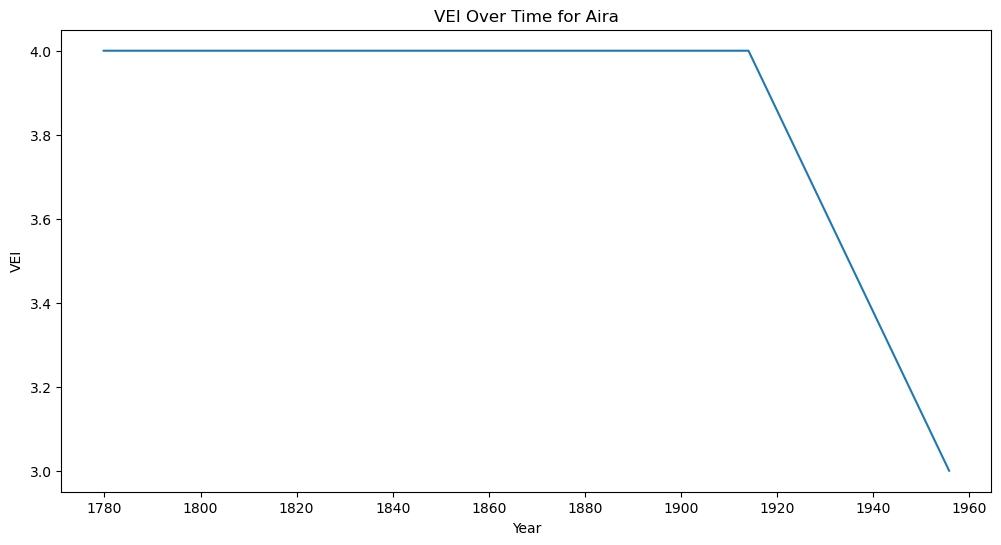

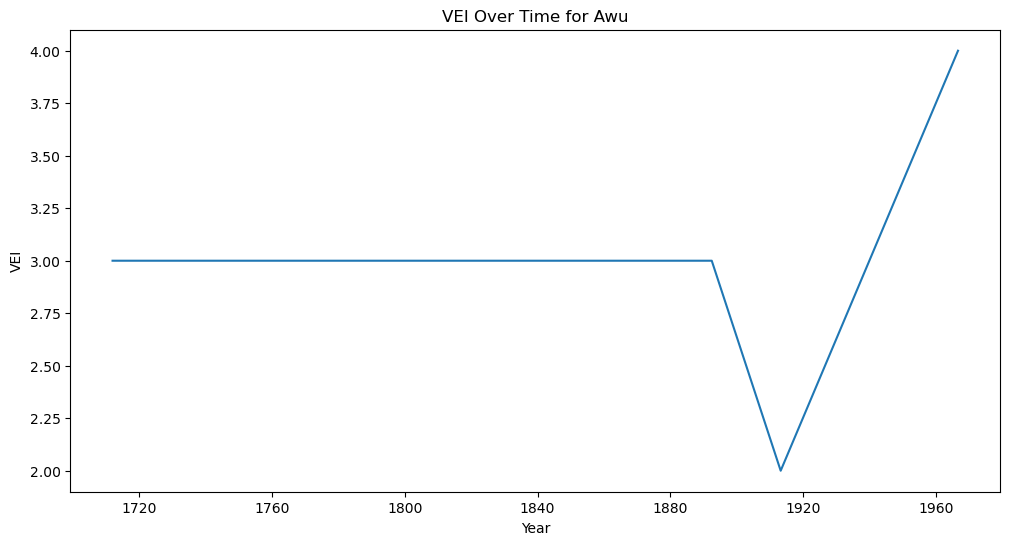

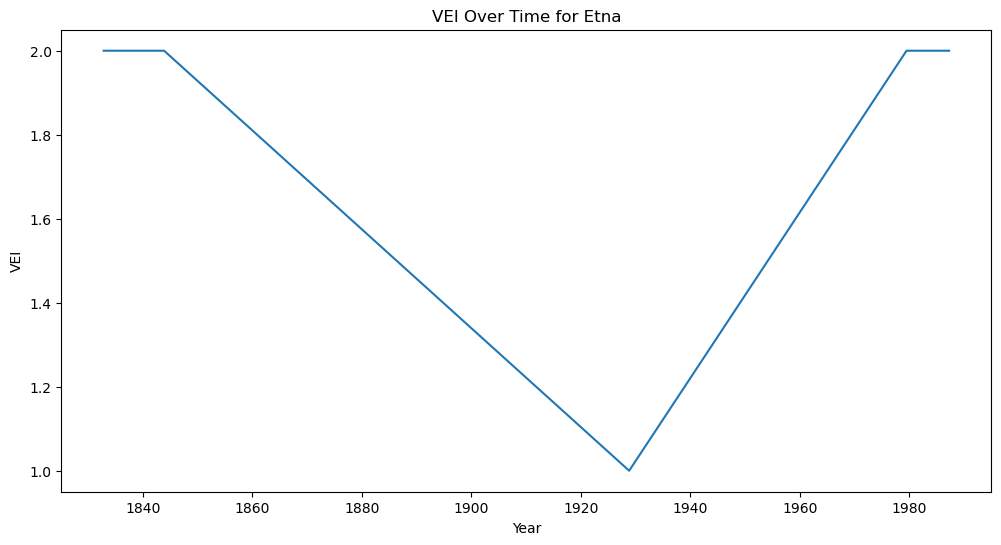

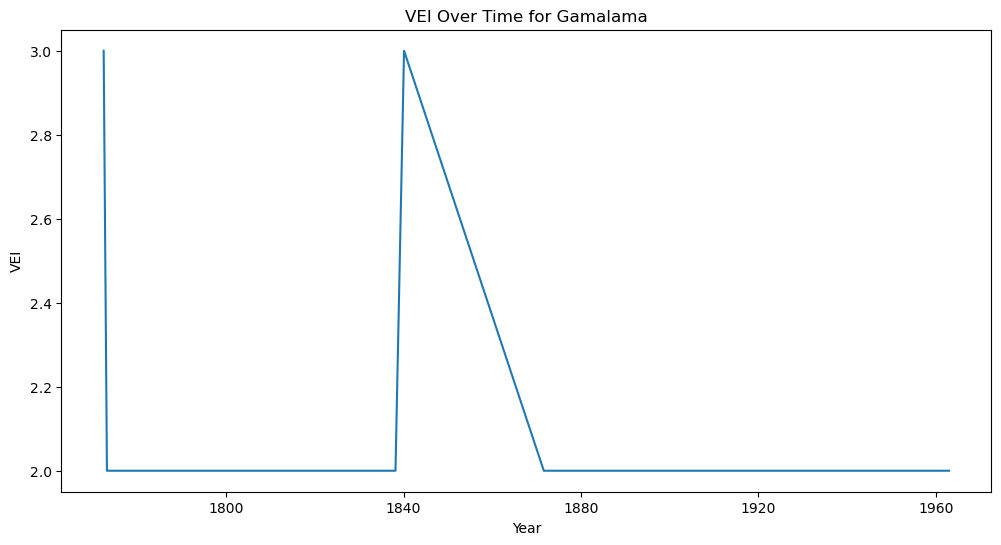

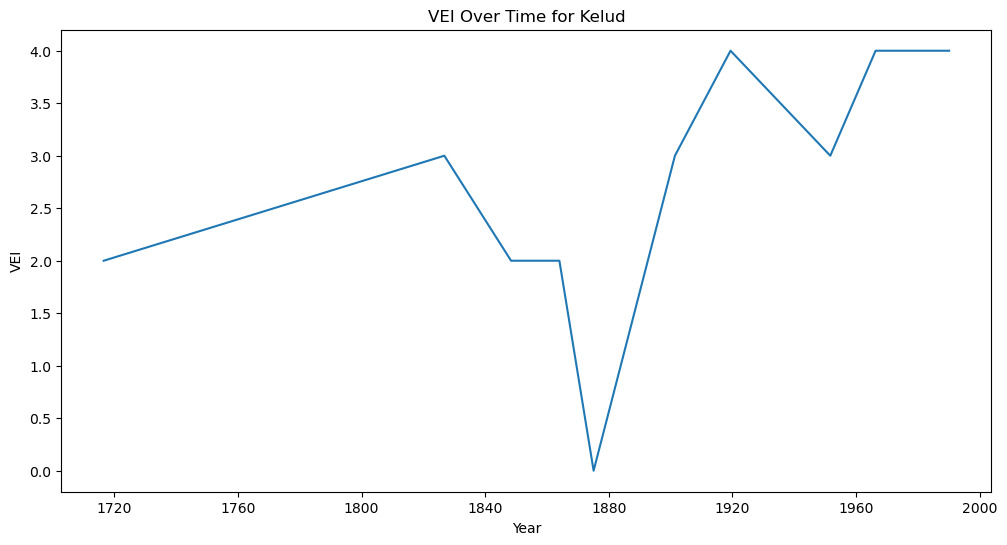

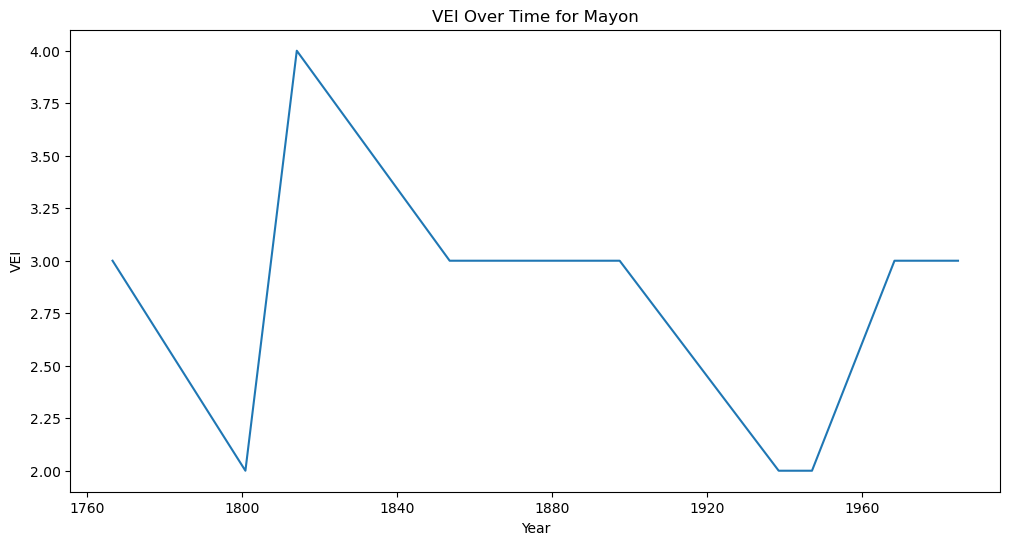

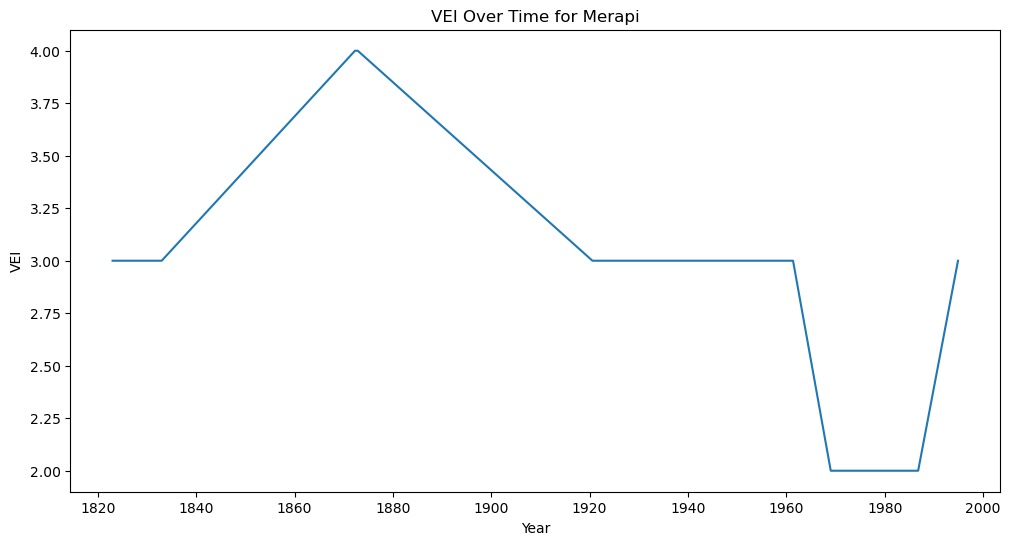

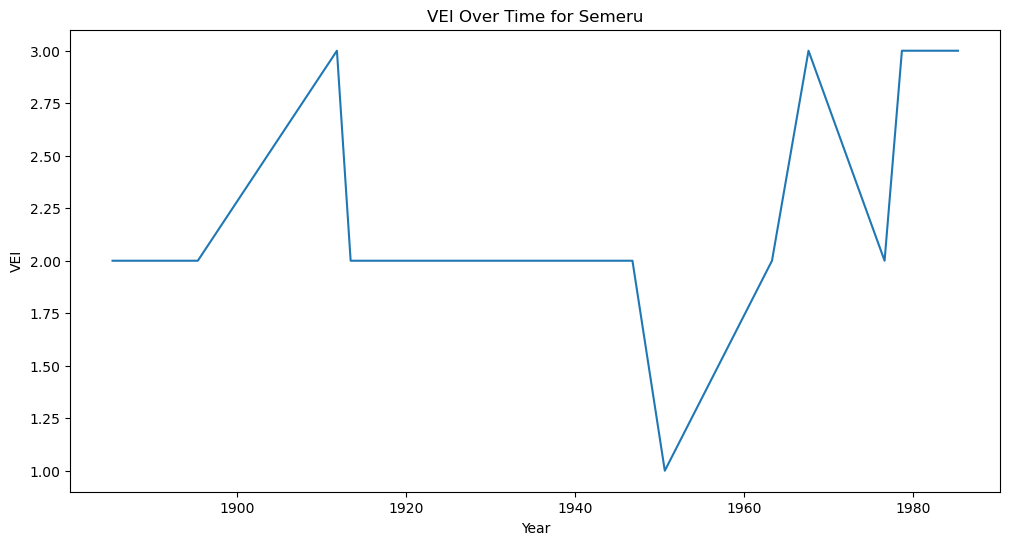

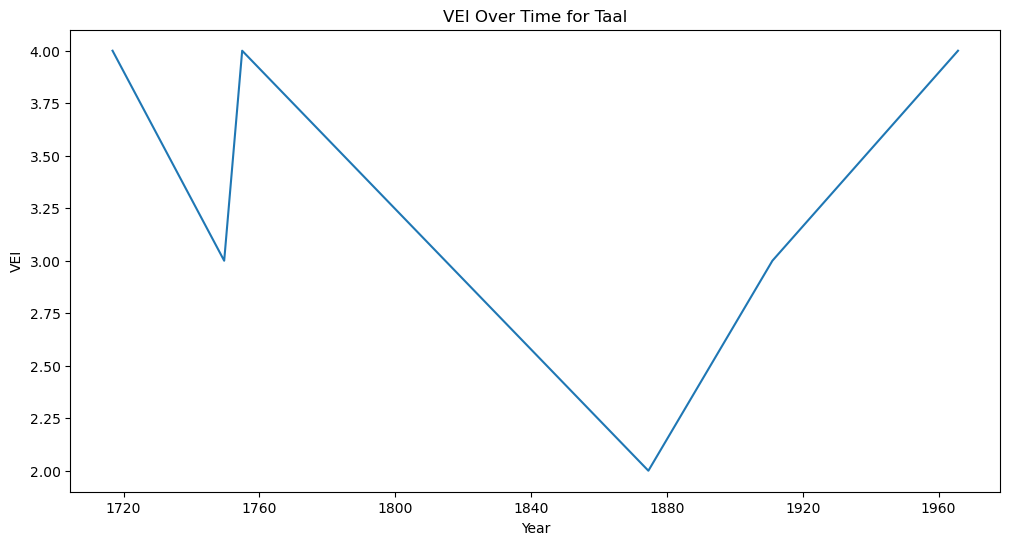

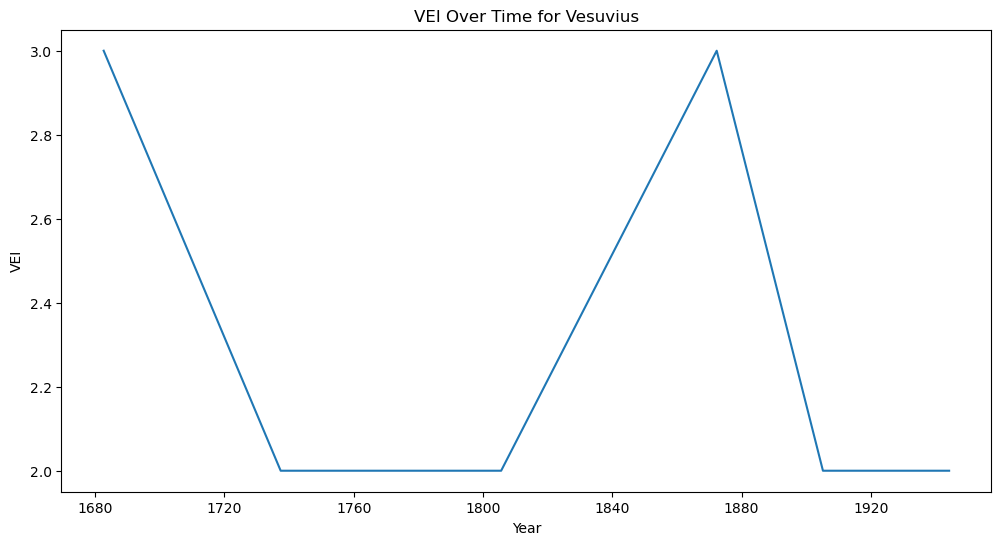

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
filtered_df = new_df[new_df['name'].map(new_df['name'].value_counts()) > 3]
grouped = filtered_df.groupby('name')
for name, group in grouped:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='date', y='vei', data=group)
    plt.xlabel('Year')
    plt.ylabel('VEI')
    plt.title(f'VEI Over Time for {name}')
    plt.show()

### **Part 3: Fiery Jobs  (15 POINTS TOTAL)**

Proficiency in SQL is also super important. SQL databases are essentially relational databases in which there are vast amounts of tabular data. which can often be used to connect with related tablular data. [This](https://www.w3schools.com/sql/) is a pretty good intro into learning more about SQL.

Check out this [tutorial](https://mode.com/sql-tutorial/introduction-to-sql/) for some clarifications on SQL.

Now! We'll be using **sqlite** to access a database.
* Start by downloading the sql lite file and putting it in the same directory as this [notebook](https://www.kaggle.com/datasets/kaggle/sf-salaries) (hit the 'download' button in the upper right).
* Check out the description of the data so you know the table / column names.

The following code will use sqlite3 to create a database connection. sqlite3 is the library in Python that assists in navigating through SQL databases.

In [35]:
import sqlite3
# import pandas as pd. Pandas was already imported from the previous sections
conn = sqlite3.connect("database.sqlite")
crsr = conn.cursor()

In [36]:
# This code will let you check out the different tables within the database.
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = crsr.execute(query).fetchall()
print(tables)

[('Salaries',), ('Salaries_2011',), ('Salaries_2012',), ('Salaries_2013',), ('Salaries_2014',)]


##### **Remember that each problem should be solved with a single sql query.**
**All outputs must be shown**

#### **3.1.1: 2 Points**
***From the Salaries table, get the average base pay for "firefighters" (all job titles consisting of the word "firefighter" (not case sensitive)) between the year 2011 to 2013.***

In [38]:
query = 'Select avg(BasePay) from Salaries where lower(JobTitle) like "%firefighter%" and Year between 2011 and 2013'
# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

,avg(BasePay)
0,102316.120003


#### **3.1.2: 2 Points**
***From the Salaries table, create a table for the year 2014, with a job title of "firefighters" (all job titles consisting of the word "firefighter" (not case sensitive)) making under $100,000 as a base pay, and sort in descending order by salary.***

In [40]:
query = 'Select * from Salaries where lower(JobTitle) like "%firefighter%" and Year=2014 and BasePay < 100000 ORDER BY BasePay DESC'

# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,117471,Cary P Butcher,Firefighter,99889.45,4761.55,18038.94,38394.03,122689.94,161083.97,2014,,San Francisco,FT
1,117448,Travis J Rail,Firefighter,99527.95,14830.62,9905.73,36954.98,124264.30,161219.28,2014,,San Francisco,FT
2,113545,Francisco A Ochoa,Firefighter,99442.91,43930.05,15531.45,37894.35,158904.41,196798.76,2014,,San Francisco,FT
3,118757,Ashley S Jardine,EMT/Paramedic/Firefighter,99364.17,6321.99,10925.15,34825.87,116611.31,151437.18,2014,,San Francisco,PT
4,116445,Stephanie L Mcknight,Firefighter,98704.80,20882.43,11647.77,37479.24,131235.00,168714.24,2014,,San Francisco,FT
5,115057,Destin Rey S Tianero,EMT/Paramedic/Firefighter,98673.65,32213.90,11158.09,38160.50,142045.64,180206.14,2014,,San Francisco,FT
6,117647,Robert Craig Gordon,EMT/Paramedic/Firefighter,98637.95,5535.25,16271.26,39333.35,120444.46,159777.81,2014,,San Francisco,FT
7,119309,Sean A Zamb,Firefighter,98502.41,3252.63,9471.95,36587.73,111226.99,147814.72,2014,,San Francisco,FT
8,114523,Brian K Sullivan,Firefighter,98486.78,35088.28,9824.29,41360.06,143399.35,184759.41,2014,,San Francisco,FT
9,114418,Arthur I Julaton,EMT/Paramedic/Firefighter,98449.85,42528.74,8108.79,36761.62,149087.38,185849.00,2014,,San Francisco,FT


#### **3.1.3: 4 Points**
***Create a dataframe with averages of base pay, averages of benefits, and averages of overtime for "firefighters" (all job titles consisting of the word "firefighter" (not case sensitive)) as well as a column with the sum of these three values.***

***Exclude job titles containing "FIREFIGHTER" (case-sensitive)***

In [42]:
query = 'Select avg(BasePay) as average_base_pay,avg(Benefits) as average_benefits, avg(OvertimePay) as average_overtime_pay, avg(BasePay)+avg(Benefits)+avg(OvertimePay) as avg_pay from Salaries where Jobtitle not like "%FIREFIGHTER%"'

# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

,average_base_pay,average_benefits,average_overtime_pay,avg_pay
0,65064.135908,18629.155415,4478.383831,88171.675154


#### **3.1.4: 7 Points**

***Finally, we'll create our own table in our database. Separate the Salaries table by years, and add it back to the database. Using a loop might be helpful.***

* You may use basic python to complete the task. However, using querying on SQL is **mandatory**.
* Feel free to **use multiple lines of code for this problem only.**
* Check out this [Hint](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html)

In [44]:
import pandas as pd
distinct_years_query = """
SELECT DISTINCT Year from Salaries
"""
crsr.execute(distinct_years_query)
distinct_years = crsr.fetchall()
distinct_years =  [year[0] for year in distinct_years]

#print(distinct_years)==> gives, [2011,2012,2013,2014]

#from the csv file, we can say, the unique distinct years are 2011,2012,2013,2014, so, directly, distinct_years=[2011,2012,2013,2014]
for year in distinct_years:
  query = f"SELECT * FROM Salaries WHERE Year = {year}"
  df_year = pd.read_sql(query, conn)
  table_name = f"Salaries_{year}"
  df_year.to_sql(table_name, conn, if_exists='replace', index=False)

In [45]:
# Run this code to check if you successfully added your table.
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('Salaries',), ('Salaries_2011',), ('Salaries_2012',), ('Salaries_2013',), ('Salaries_2014',)]


![volcano](https://as1.ftcdn.net/v2/jpg/06/34/76/64/1000_F_634766457_0fZbpYj6aBLlldO1jADUPpKTRLnNmngs.jpg)

### **Part 4: Be Creative with SQL  (20 POINTS TOTAL)**

For a more interactive SQL experience within a Jupyter notebook or Google Colab, you can use the %sql magic command from the ipython-sql extension. Here's how:

* Install ipython-sql: !pip install ipython-sql
* Load the extension and connect to SQLite:

%load_ext sql

%sql sqlite:///restaurent.db


* Run SQL queries directly in cells using

%%sql

In [49]:
!pip install ipython-sql

In [50]:
%load_ext sql

In [51]:
%sql sqlite:///restaurent.db

However, you can also continue to import the sqlite3 library and create a connection and cursor to execute SQL commands, as you did before. The choice is up to you.

*** Part 4.1(a)  CREATE A TABLE ***

Create a table called **MyRestaurants** with the following attributes:

* RestaurantName: A VARCHAR field
* FoodType: A VARCHAR field
* DistanceFromHome: An INTEGER field representing the distance (in minutes) from your house
* LastVisitDate: A DATE field representing the date of your last visit
* Liked: A BOOLEAN field indicating whether you like the restaurant or not

In [54]:
%%sql 
CREATE TABLE IF NOT EXISTS MyRestaurants (RestaurantName VARCHAR, FoodType VARCHAR, DistanceFromHome INTEGER, LastVisitDate DATE, Liked BOOLEAN)

 * sqlite:///restaurent.db
Done.


[]

*** Part 4.1(b) Insert Tuples ***

Insert at least five tuples using the SQL INSERT command, executing it five (or more) times.

* Ensure that you insert ** at least one restaurant that you liked**, **at least one restaurant that you did not like**, and **at least one restaurant where the Liked field is set to NULL**.

In [56]:
%%sql
INSERT INTO MyRestaurants (RestaurantName, FoodType, DistanceFromHome, LastVisitDate, Liked) VALUES
('RestA', 'Mexican', 20, '2024-09-26', TRUE),
('RestB', 'Spanish', 10, '2024-09-23', FALSE),
('RestC', 'Chinese', 12.5, '2024-09-21', NULL),
('RestD', 'Italian', 18, '2024-09-24', FALSE),
('RestE', 'French', 15, '2024-09-20', TRUE);

 * sqlite:///restaurent.db
5 rows affected.


[]

*** Part 4.1(c) ***

Write a SQL query to return all restaurants in your table.

Below query prints all the details from MyRestaurants

In [59]:
%%sql
Select * from MyRestaurants

 * sqlite:///restaurent.db
Done.


RestaurantName,FoodType,DistanceFromHome,LastVisitDate,Liked
RestA,Mexican,20,2024-09-26,1
RestB,Spanish,10,2024-09-23,0
RestC,Chinese,12.5,2024-09-21,None
RestD,Italian,18,2024-09-24,0
RestE,French,15,2024-09-20,1


Printing only Restaurants name

In [61]:
%%sql
Select DISTINCT RestaurantName from MyRestaurants

 * sqlite:///restaurent.db
Done.


RestaurantName
RestA
RestB
RestC
RestD
RestE


*** Part 4.1(d) ***

Now experiment with a few of SQLite's output formats using the SQL query you wrote for question above:

* print the results (Part 4.1(c)) in list form, delimited by " | "

Sample output: Sushi Place | Japanese | 15 | 2024-05-01 | 1

In [63]:
%%sql
SELECT CONCAT(RestaurantName,'|',FoodType,'|',DistanceFromHome,'|',LastVisitDate,'|',Liked) as Results_List FROM MyRestaurants;

 * sqlite:///restaurent.db
Done.


Results_List
RestA|Mexican|20|2024-09-26|1
RestB|Spanish|10|2024-09-23|0
RestC|Chinese|12.5|2024-09-21|
RestD|Italian|18|2024-09-24|0
RestE|French|15|2024-09-20|1


*** Part 4.1(d) ***

Modify your SQL query such that it prints "I liked it" or "I hated it" for each restaurant you liked or not.


Note that you are not allowed to modify the table on disk. You should be able to answer this question using only a SELECT statement. A solution that creates and uses an extra table, howerver, will be accepted.

Check: https://www.sqlitetutorial.net/sqlite-case/


The below is printing liked or hated only for True or false but not null scenario

In [66]:
%%sql
SELECT RestaurantName,
       FoodType,
       DistanceFromHome,
       LastVisitDate,
       CASE Liked 
           WHEN '1' 
               THEN 'I liked it' 
           WHEN '0'
               THEN 'I hated it' 
       END LikedOrNot
FROM 
    MyRestaurants

 * sqlite:///restaurent.db
Done.


RestaurantName,FoodType,DistanceFromHome,LastVisitDate,LikedOrNot
RestA,Mexican,20,2024-09-26,I liked it
RestB,Spanish,10,2024-09-23,I hated it
RestC,Chinese,12.5,2024-09-21,None
RestD,Italian,18,2024-09-24,I hated it
RestE,French,15,2024-09-20,I liked it


The below is printing hated when its null

In [68]:
%%sql
SELECT RestaurantName,
       FoodType,
       DistanceFromHome,
       LastVisitDate,
       CASE Liked 
           WHEN '1' 
               THEN 'I liked it' 
           ELSE
               'I hated it' 
       END LikedOrNot
FROM 
    MyRestaurants

 * sqlite:///restaurent.db
Done.


RestaurantName,FoodType,DistanceFromHome,LastVisitDate,LikedOrNot
RestA,Mexican,20,2024-09-26,I liked it
RestB,Spanish,10,2024-09-23,I hated it
RestC,Chinese,12.5,2024-09-21,I hated it
RestD,Italian,18,2024-09-24,I hated it
RestE,French,15,2024-09-20,I liked it


*** Part 4.1(e) ***

Write a SQL query to return all restaurants that you like but have not visited in the past three months.

The above table dont have this record, so adding a value explicity 1st into the database for > 3 months:

In [71]:
%%sql
INSERT INTO MyRestaurants (RestaurantName, FoodType, DistanceFromHome, LastVisitDate, Liked) VALUES
('RestF', 'Japanese', 11, '2024-03-25', TRUE)

 * sqlite:///restaurent.db
1 rows affected.


[]

In [72]:
%%sql
Select * from MyRestaurants

 * sqlite:///restaurent.db
Done.


RestaurantName,FoodType,DistanceFromHome,LastVisitDate,Liked
RestA,Mexican,20,2024-09-26,1
RestB,Spanish,10,2024-09-23,0
RestC,Chinese,12.5,2024-09-21,None
RestD,Italian,18,2024-09-24,0
RestE,French,15,2024-09-20,1
RestF,Japanese,11,2024-03-25,1


Checking for the last 3 months directly or 90 days, gives the same results in below query:

In [74]:
%%sql
Select * from MyRestaurants where Liked = 1 and LastVisitDate < date('now', '-3 months')

 * sqlite:///restaurent.db
Done.


RestaurantName,FoodType,DistanceFromHome,LastVisitDate,Liked
RestF,Japanese,11,2024-03-25,1


*** Part 4.2(a) ***

** Next we will focus on INNER JOIN **

Let's add a second table called **"RestaurantReviews"** and demonstrate how to perform an inner join between MyRestaurants and RestaurantReviews.




Create the RestaurantReviews Table
First, we'll create the RestaurantReviews table with the following attributes:

* RestaurantName (to match the Name in MyRestaurants)
* ReviewText (text of the review)
* Rating (integer rating)

In [77]:
%%sql 
CREATE TABLE IF NOT EXISTS RestaurantReviews (RestaurantName VARCHAR, ReviewText VARCHAR, Rating INTEGER)

 * sqlite:///restaurent.db
Done.


[]

*** Part 4.2(b) ***

Insert Data into RestaurantReviews
Insert some sample data (at least 5) into this table:


Adding some random reviews and random ratings

In [80]:
%%sql
INSERT INTO RestaurantReviews (RestaurantName, ReviewText, Rating) VALUES
('RestA', 'Good Restaurant with ambience!!','4'),
('RestB', 'Worst Food!!','1'),
('RestC', 'Quality Can be Improved!!','2'),
('RestD', 'Average', '3'),
('RestE', 'Amazing Food!! Best Restaurant Ever!.', '5'),
('RestF', 'Overall Satisfactory!!', '4');

 * sqlite:///restaurent.db
6 rows affected.


[]

*** Part 4.2(c) Inner Join Query ***
Now perform an inner join between MyRestaurants and RestaurantReviews based on the restaurant name to combine the information from both tables and show the results.

In [82]:
%%sql
SELECT M.RestaurantName,M.FoodType,M.DistanceFromHome,M.LastVisitDate,M.Liked, R.ReviewText,R.Rating
FROM MyRestaurants M
INNER JOIN RestaurantReviews R on M.RestaurantName = R.RestaurantName;

 * sqlite:///restaurent.db
Done.


RestaurantName,FoodType,DistanceFromHome,LastVisitDate,Liked,ReviewText,Rating
RestA,Mexican,20,2024-09-26,1,Good Restaurant with ambience!!,4
RestB,Spanish,10,2024-09-23,0,Worst Food!!,1
RestC,Chinese,12.5,2024-09-21,None,Quality Can be Improved!!,2
RestD,Italian,18,2024-09-24,0,Average,3
RestE,French,15,2024-09-20,1,Amazing Food!! Best Restaurant Ever!.,5
RestF,Japanese,11,2024-03-25,1,Overall Satisfactory!!,4


## THE END OF HW 1 ##